## Loading libraries and Data

In [ ]:
import multiprocessing
import gensim.models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pandas as pd
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import re
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Load dataset - SST5
train_dataset = pd.read_csv('./train.txt', sep="\t", header=None, names=["label", "data"])
validation_dataset = pd.read_csv('./dev.txt', sep="\t", header=None, names=["label", "data"])
test_dataset = pd.read_csv('./test.txt', sep="\t", header=None, names=["label", "data"])

In [ ]:
#Get the number of classes
n_classes = train_dataset['label'].nunique()
print('N classes: ', n_classes)

N classes:  5


In [ ]:
print(train_dataset['label'].value_counts())
print(len(train_dataset['label']))

4    2322
2    2218
3    1624
5    1288
1    1092
Name: label, dtype: int64
8544


## Visualization

In [ ]:
train_dataset.head()

,label,data
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


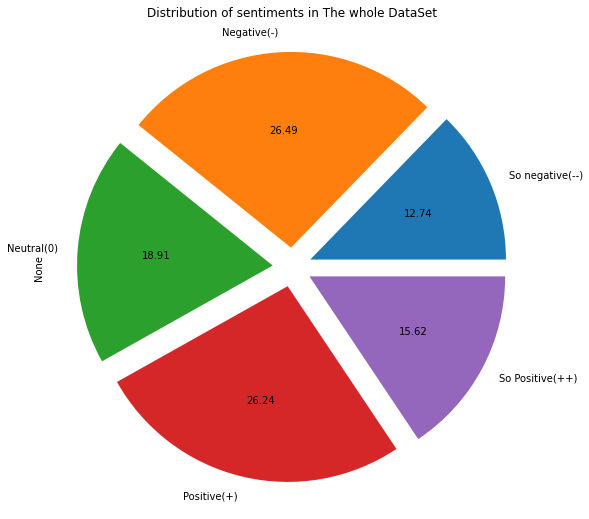

In [ ]:
import matplotlib.pyplot as plt
train_l =train_dataset['label']
validation_l =validation_dataset['label']
test_l =test_dataset['label']
data_l = pd.concat([train_l, validation_l,test_l])
index, counts = np.unique(
    data_l.to_numpy(),
    return_counts=True
    )
suma = pd.Series(counts,  index)
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1]
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
suma.plot(kind='pie', labels =["So negative(--)","Negative(-)","Neutral(0)","Positive(+)","So Positive(++)"],autopct='%.2f', explode = myexplode, title = "Distribution of sentiments in The whole DataSet")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27aaf3c820>],
      dtype=object)

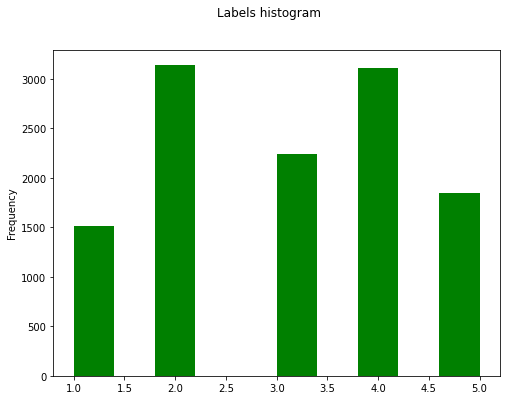

In [ ]:
data_l.plot(kind='hist',subplots=True,sharex=True,sharey=True,rwidth=1,figsize=(8,6),color='green',title='Labels histogram')

In [ ]:
print(train_dataset.isnull().sum())
print(validation_dataset.isnull().sum())
print(test_dataset.isnull().sum())

label    0
data     0
dtype: int64
label    0
data     0
dtype: int64
label    0
data     0
dtype: int64


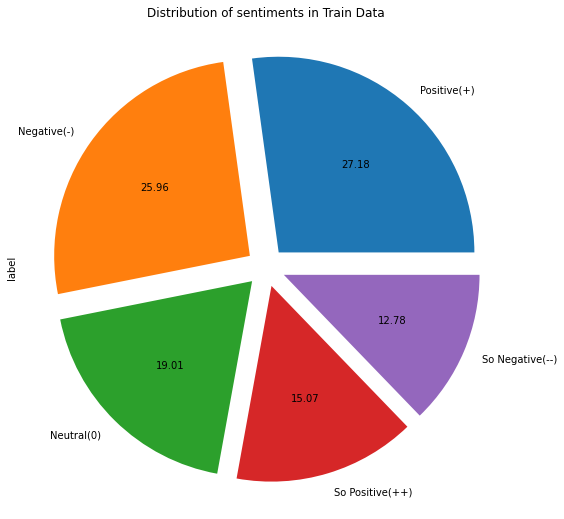

In [ ]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
train_dataset['label'].value_counts().plot(kind='pie', labels =  ["Positive(+)","Negative(-)","Neutral(0)","So Positive(++)","So Negative(--)"],autopct='%.2f', explode = myexplode, title = "Distribution of sentiments in Train Data")
plt.show()

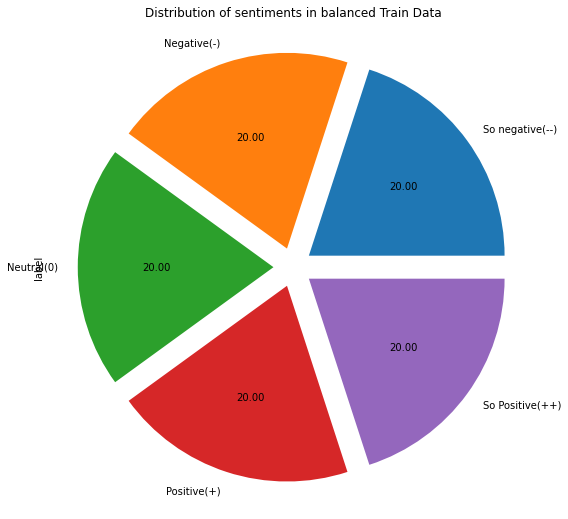

In [ ]:
balanced_train_dataset = train_dataset.groupby('label')
balanced_train_dataset = balanced_train_dataset.apply(lambda x: x.sample(balanced_train_dataset.size().min()).reset_index(drop=True))
balanced_train_dataset['label'].value_counts()
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
balanced_train_dataset['label'].value_counts().plot(kind='pie', labels =  ["So negative(--)","Negative(-)","Neutral(0)","Positive(+)","So Positive(++)"],autopct='%.2f', explode = myexplode, title = "Distribution of sentiments in balanced Train Data")
plt.show()

In [ ]:
train_dataset = balanced_train_dataset

In [ ]:
#Clean the 
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

sents = []

for review in train_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)

for review in validation_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)

for review in test_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)



In [ ]:
print(len(sents), sents[0])

8771 ['so-so', 'made-for-TV', 'something', 'posing', 'real', 'movie']


In [ ]:
from gensim.models.phrases import Phrases, Phraser

bigram = Phrases(sents, min_count=1, progress_per=1000, threshold = 2)
sentences = bigram[sents]


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
sentences = sents

In [ ]:
cores = multiprocessing.cpu_count()

In [ ]:
!wget -O GoogleNews-vectors-negative300.bin.gz -c "http://vectors.nlpl.eu/repository/11/1.zip"

--2022-12-01 19:55:16--  http://vectors.nlpl.eu/repository/11/1.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5700887510 (5.3G) [application/zip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   5.31G  27.1MB/s    in 3m 24s  

2022-12-01 19:58:40 (26.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [5700887510/5700887510]



In [ ]:
!unzip GoogleNews-vectors-negative300.bin.gz -d GoogleNews.bin.gz

Archive:  GoogleNews-vectors-negative300.bin.gz
  inflating: GoogleNews.bin.gz/meta.json  
  inflating: GoogleNews.bin.gz/model.bin  
  inflating: GoogleNews.bin.gz/model.txt  
  inflating: GoogleNews.bin.gz/README  


In [ ]:
# w2v_model = Word2Vec(min_count=5,
#                      window=4,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      sg = 1, #For skipgram model
#                      workers=cores-1)

#Another approach

w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews.bin.gz/model.bin", binary=True)
w2v_model.init_sims(replace=True)

In [ ]:
#Build model
#w2v_model.build_vocab(sentences, progress_per=1000)

In [ ]:
#Train model
#w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [ ]:
# w2v_model.wv.vocab
# w2v_model.wv['new']

In [ ]:
vocab = [w.split('_')[0]for w in w2v_model.vocab.keys()] 
# w2v_model.vocab
print(vocab[0:10], len(vocab))

['</s>', 'in', 'for', 'that', 'is', 'on', 'The', 'with', 'said', 'was'] 2883863


In [ ]:
vector_dict = {k.split('_')[0] : w2v_model.syn0norm[w2v_model.vocab[k].index] for k, v in w2v_model.vocab.items()}

<ipython-input-25-cf7da87712dd>:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  vector_dict = {k.split('_')[0] : w2v_model.syn0norm[w2v_model.vocab[k].index] for k, v in w2v_model.vocab.items()}


In [ ]:
w2v_model.vocab

In [ ]:
w2v_model.syn0norm[w2v_model.vocab['living_VERB'].index].shape

<ipython-input-71-341c824846b3>:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  w2v_model.syn0norm[w2v_model.vocab['living_VERB'].index].shape


(300,)

In [ ]:
len(sents)

8771

In [ ]:
#Build numpy vectors for each dataset

embeddings = np.zeros((len(train_dataset) + len(validation_dataset) + len(test_dataset), 300))

for i, sent in enumerate(sents):
# for i, sent in enumerate(sentences):

    if i % 100 == 0:
        print(i)

    review_array = np.zeros((300,))
    found = 0
    for w in sent:
        found +=1
        # if w in w2v_model.wv.vocab:
        if w in vocab:
            # review_array = np.add(review_array, w2v_model.vocab[w])
            review_array = np.add(review_array, vector_dict[w])

    # if found != 0:
    #     embeddings[i] = np.divide(review_array, found) 
    # else:
    #      embeddings[i] = review_array
    embeddings[i] = review_array

In [ ]:
train_embeddings = embeddings[:len(train_dataset), :]
validation_embeddings = embeddings[len(train_dataset):(len(train_dataset)+len(validation_dataset)), :]
test_embeddings = embeddings[(len(train_dataset)+len(validation_dataset)):]

In [ ]:
print(train_embeddings.shape)
print(validation_embeddings.shape)
print(test_embeddings.shape)

(5460, 300)
(1101, 300)
(2210, 300)


In [ ]:
train_labels = train_dataset.label.to_numpy() -1 # So it starts from 0 and not 1
dev_labels = validation_dataset.label.to_numpy() -1
test_labels = test_dataset.label.to_numpy() -1


## SVM Classifier 

In [ ]:
# Add some tuning considerations
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01],'kernel': ['linear','rbf', 'poly']}
# Grid Search already run, it takes a long time, about 16 minutes, that's Why is commented 
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(train_embeddings, train_labels)

svm = SVC(kernel="rbf",gamma=0.1, C=1.0)
svm.fit(train_embeddings, train_labels)

SVC(gamma=0.1)

In [ ]:
#print(grid.best_estimator_)
#print(grid.best_params_)

SVC(C=1, gamma=0.1)
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import f1_score, roc_curve, confusion_matrix, classification_report,accuracy_score
dev_predictions = svm.predict(validation_embeddings)
acc_dev = accuracy_score(dev_labels, dev_predictions)

test_predictions = svm.predict(test_embeddings)
acc_test = accuracy_score(test_labels, test_predictions)
print('Dev acc: ', acc_dev)
print('Test acc: ', acc_test)

print('Test f1 average micro: ',f1_score(np.array(test_labels), np.array(test_predictions), average="micro"))
print('Test f1 average macro: ',f1_score(np.array(test_labels), np.array(test_predictions), average="macro"))

confusion = confusion_matrix(test_labels, test_predictions)
print('SVM (linear kernel, C=1)\n',confusion)
#print(classification_report(test_labels, test_predictions))
#print(classification_report(dev_labels, dev_predictions))

Dev acc:  0.3941871026339691
Test acc:  0.4167420814479638
Test f1 average micro:  0.4167420814479638
Test f1 average macro:  0.41778788504569453
SVM (linear kernel, C=1)
 [[146  57  40  22  14]
 [163 200 138  96  36]
 [ 51  82 124  98  34]
 [ 30  49  82 221 128]
 [  9  20  33 107 230]]


Text(0.5, 33.0, 'Predicted label')

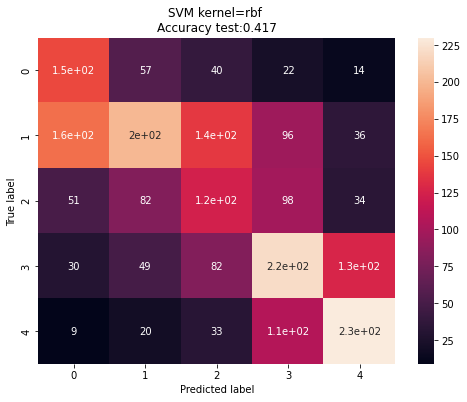

In [ ]:
import seaborn as sns
test_predictions = svm.predict(test_embeddings)
confusion_mc = confusion_matrix(test_labels, test_predictions)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,5)], columns = [i for i in range(0,5)])

plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True)
plt.title('SVM kernel=rbf \nAccuracy test:{0:.3f}'.format(accuracy_score(test_labels,test_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')